In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df_eda = pd.read_csv("avito_pfm_post_cleaning.csv")
df_eda.head()

Prix      Boite√†V Carburant  kilometrage   Marque   Mod√®le  NBporte  \
0  155.0     Manuelle    Diesel         40.0  Renault  Express        5   
1  180.0  Automatique    Diesel        100.0    Dacia   Duster        5   
2  225.0  Automatique    Diesel        120.0  Hyundai   Tucson        5   
3  130.0     Manuelle    Diesel        200.0  Renault     Clio        5   
4  148.0     Manuelle    Diesel        150.0     Ford    Focus        5   

          Origine Premi√®re main  Puissance fiscale       Etat  \
0     WW au Maroc           Non                6.0        Bon   
1     WW au Maroc           Non                6.0  Excellent   
2     WW au Maroc           Non                6.0   Tr√®s bon   
3     WW au Maroc           Oui                6.0  Excellent   
4  Import√©e neuve           Non                6.0  Excellent   

                                         √©quipements   Age  
0                                                 []   2.0  
1  ["Limiteur de vitesse", "Jantes aluminium", "C...   3.0  
2  ["Jantes aluminium", "Airbags", "Cam\u00e9ra d...   6.0  
3       ["Climatisation", "Vitres \u00e9lectriques"]  12.0  
4  ["Limiteur de vitesse", "Jantes aluminium", "O...   9.0

In [ ]:
# Liste des variables continues
continous_vars = ['Prix', 'kilometrage']

# Conversion en num√©rique si besoin
for var in continous_vars:
    df_eda[var] = pd.to_numeric(df_eda[var], errors='coerce')

# Statistiques
for var in continous_vars:
    if df_eda[var].notnull().sum() > 0:
        mean = df_eda[var].mean()
        std = df_eda[var].std()
        variance = df_eda[var].var()
        cv = std / mean * 100
        q1 = df_eda[var].quantile(0.25)
        q2 = df_eda[var].median()
        q3 = df_eda[var].quantile(0.75)

        print(f"Statistiques pour la variable '{var}':")
        print(f"Moyenne: {mean:.2f}")
        print(f"√âcart-Type: {std:.2f}")
        print(f"Variance: {variance:.2f}")
        print(f"Coefficient de Variation (CV): {cv:.2f}%")
        print(f"Q1 (25e percentile): {q1:.2f}")
        print(f"Q2 (M√©diane): {q2:.2f}")
        print(f"Q3 (75e percentile): {q3:.2f}")
        print("-" * 50)
    else:
        print(f"La variable '{var}' ne contient pas de donn√©es valides.\n" + "-"*50)
        
    


Statistiques pour la variable 'Prix':
Moyenne: 179.70
√âcart-Type: 163.20
Variance: 26633.80
Coefficient de Variation (CV): 90.82%
Q1 (25e percentile): 95.00
Q2 (M√©diane): 145.00
Q3 (75e percentile): 220.00
--------------------------------------------------
Statistiques pour la variable 'kilometrage':
Moyenne: 126.19
√âcart-Type: 80.82
Variance: 6531.11
Coefficient de Variation (CV): 64.04%
Q1 (25e percentile): 70.00
Q2 (M√©diane): 120.00
Q3 (75e percentile): 180.00
--------------------------------------------------


In [ ]:
# Liste des variables continues
continous_vars = ['Puissance fiscale', 'Age']

# Conversion en num√©rique si besoin
for var in continous_vars:
    df_eda[var] = pd.to_numeric(df_eda[var], errors='coerce')

# Statistiques
for var in continous_vars:
    if df_eda[var].notnull().sum() > 0:
        mean = df_eda[var].mean()
        std = df_eda[var].std()
        variance = df_eda[var].var()
        cv = std / mean * 100
        q1 = df_eda[var].quantile(0.25)
        q2 = df_eda[var].median()
        q3 = df_eda[var].quantile(0.75)

        print(f"Statistiques pour la variable '{var}':")
        print(f"Moyenne: {mean:.2f}")
        print(f"√âcart-Type: {std:.2f}")
        print(f"Variance: {variance:.2f}")
        print(f"Coefficient de Variation (CV): {cv:.2f}%")
        print(f"Q1 (25e percentile): {q1:.2f}")
        print(f"Q2 (M√©diane): {q2:.2f}")
        print(f"Q3 (75e percentile): {q3:.2f}")
        print("-" * 50)
    else:
        print(f"La variable '{var}' ne contient pas de donn√©es valides.\n" + "-"*50)
        
    


Statistiques pour la variable 'Puissance fiscale':
Moyenne: 7.46
√âcart-Type: 1.96
Variance: 3.86
Coefficient de Variation (CV): 26.34%
Q1 (25e percentile): 6.00
Q2 (M√©diane): 7.00
Q3 (75e percentile): 8.00
--------------------------------------------------
Statistiques pour la variable 'Age':
Moyenne: 9.95
√âcart-Type: 7.30
Variance: 53.25
Coefficient de Variation (CV): 73.34%
Q1 (25e percentile): 5.00
Q2 (M√©diane): 8.00
Q3 (75e percentile): 13.00
--------------------------------------------------


La distribution des variables continues

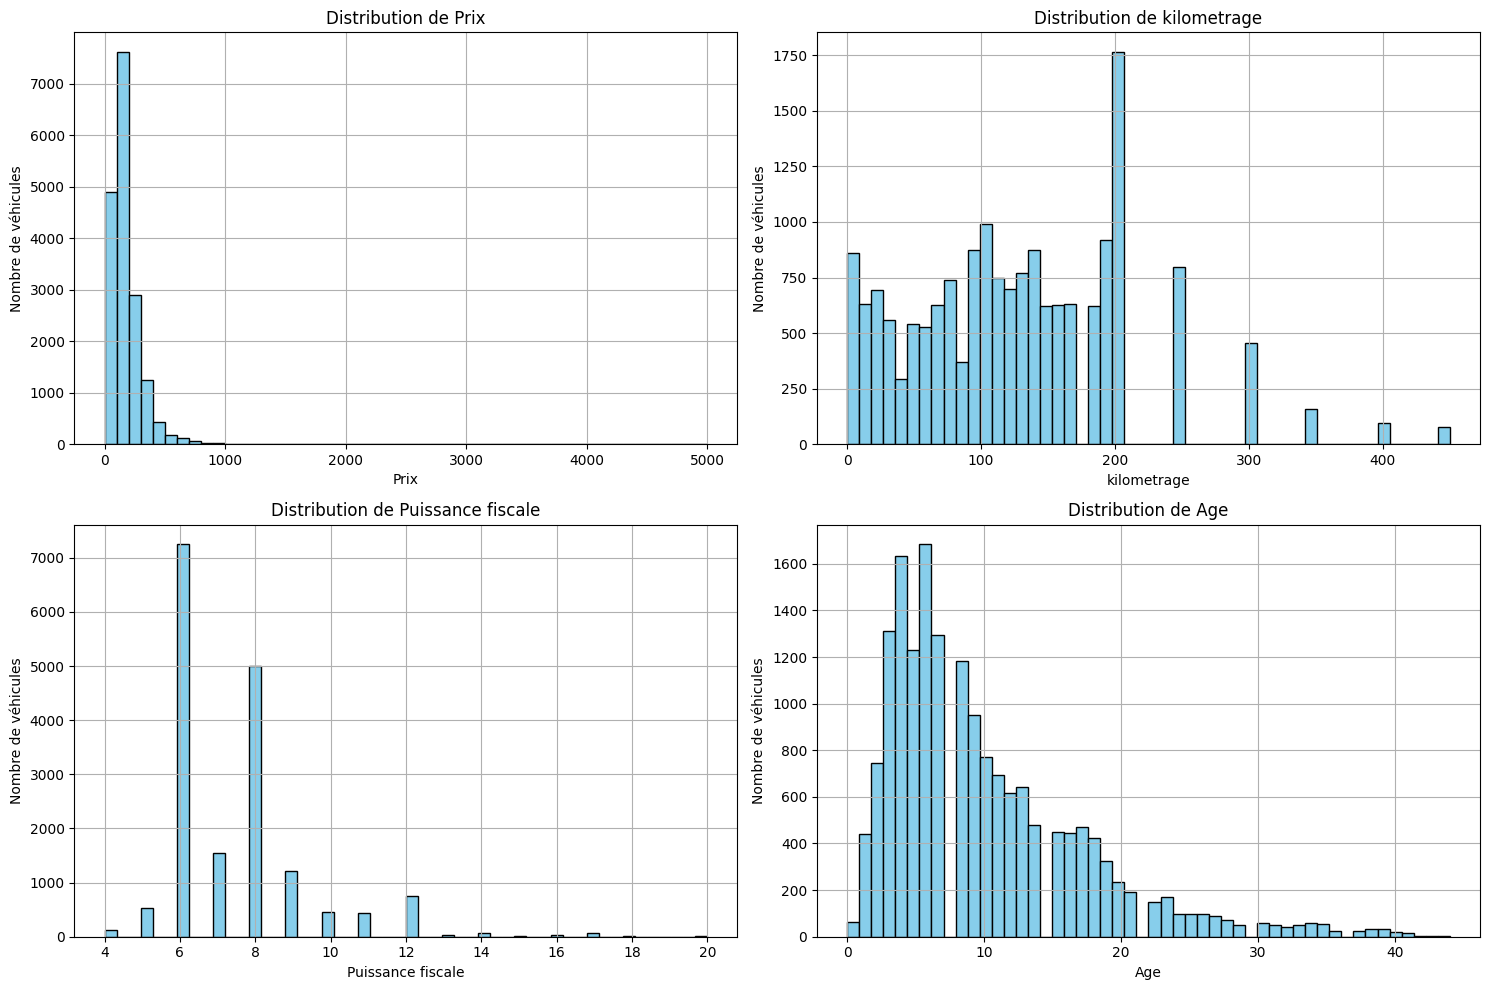

In [ ]:
import matplotlib.pyplot as plt

# 1 : D√©finir les noms de colonnes dans une LISTE
features_continues = ['Prix', 'kilometrage', 'Puissance fiscale', 'Age']

# 2 : Dessiner les histogrammes
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_continues, 1):
    plt.subplot(2, 2, i)  
    plt.hist(df_eda[feature], bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Nombre de v√©hicules")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# pip install plotly

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Cr√©er une figure avec plusieurs sous-graphiques
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Distribution du Prix (en milliers MAD)", "Distribution du Kilom√©trage (en milliers Km)",
                    "Distribution de la Puissance Fiscale (en CV)", "Distribution de l'√Çge du v√©hicule (en ann√©es)")
)

# Prix
fig.add_trace(
    go.Histogram(x=df_eda['Prix'], name="Prix"),
    row=1, col=1
)

# Kilom√©trage
fig.add_trace(
    go.Histogram(x=df_eda['kilometrage'], name="Kilom√©trage"),
    row=1, col=2
)

# Puissance fiscale
fig.add_trace(
    go.Histogram(x=df_eda['Puissance fiscale'], name="Puissance Fiscale"),
    row=2, col=1
)

# √Çge du v√©hicule
fig.add_trace(
    go.Histogram(x=df_eda['Age'], name="√Çge"),
    row=2, col=2
)

# Mise en forme g√©n√©rale
fig.update_layout(
    height=900, width=1000,
    title_text="Distribution des variables continues",
    showlegend=False
)

# Affichage
fig.show()


La distribution des variables discr√®tes

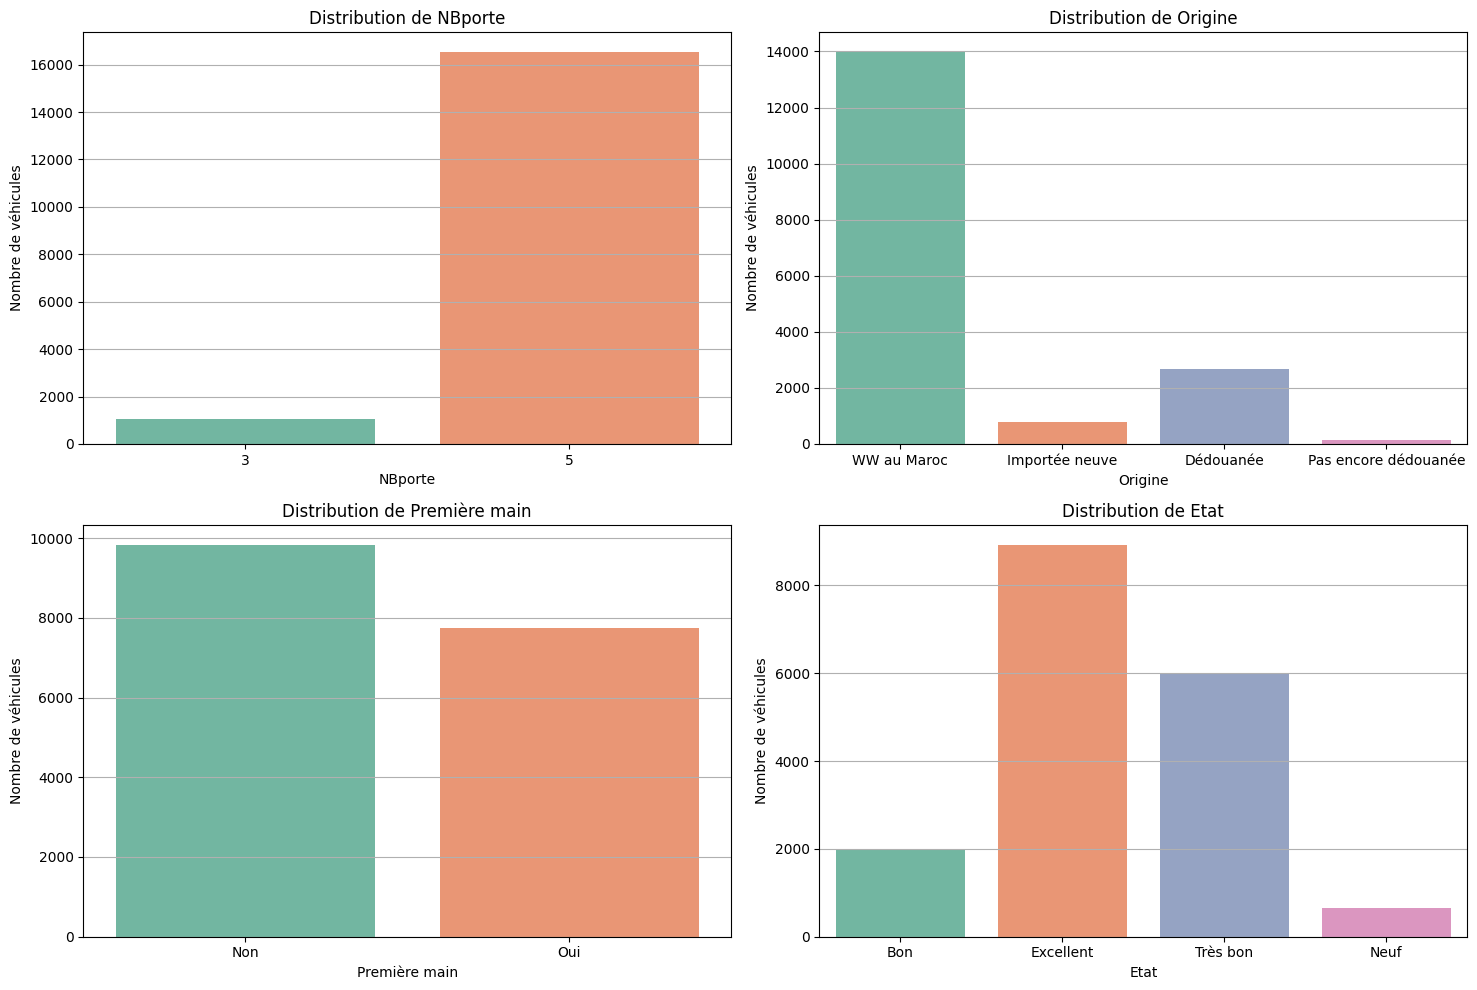

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables discr√®tes/cat√©gorielles
features_discretes = ['NBporte', 'Origine', 'Premi√®re main', 'Etat']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_discretes, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_eda, x=feature, hue=feature, palette="Set2", legend=False)
    plt.title(f"Distribution de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Nombre de v√©hicules")
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# üîπ Compter les valeurs de chaque variable discr√®te
count_carburant = df_eda['Carburant'].value_counts().reset_index()
count_carburant.columns = ['Carburant', 'count']

count_boitev = df_eda['Boite√†V'].value_counts().reset_index()
count_boitev.columns = ['Boite√†V', 'count']

count_origine = df_eda['Origine'].value_counts().reset_index()
count_origine.columns = ['Origine', 'count']

count_premiere_main = df_eda['Premi√®re main'].value_counts().reset_index()
count_premiere_main.columns = ['Premi√®re main', 'count']

count_etat = df_eda['Etat'].value_counts().reset_index()
count_etat.columns = ['Etat', 'count']

count_nbporte = df_eda['NBporte'].value_counts().reset_index()
count_nbporte.columns = ['NBporte', 'count']

# üîπ Cr√©er les sous-graphiques (subplot)
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Type de Carburant", "Bo√Æte √† Vitesse", 
                    "Origine", "Premi√®re Main", 
                    "√âtat du V√©hicule","Nomber de Porte du V√©hicule")
)

# üîπ Ajouter chaque graphique dans la figure
fig.add_trace(
    go.Bar(x=count_carburant['Carburant'], y=count_carburant['count'], name="Carburant"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=count_boitev['Boite√†V'], y=count_boitev['count'], name="Bo√Æte √† Vitesse"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=count_origine['Origine'], y=count_origine['count'], name="Origine"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=count_premiere_main['Premi√®re main'], y=count_premiere_main['count'], name="Premi√®re main"),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x=count_etat['Etat'], y=count_etat['count'], name="√âtat"),
    row=3, col=1
)

fig.add_trace(
    go.Bar(x=count_nbporte['NBporte'], y=count_nbporte['count'], name="Nomber de Porte"),
    row=3, col=2
)

# üîπ Mise en forme g√©n√©rale
fig.update_layout(
    height=1200, width=1000,
    title_text="Distribution des variables discr√®tes",
    showlegend=False
)

# üîπ Affichage final
fig.show()


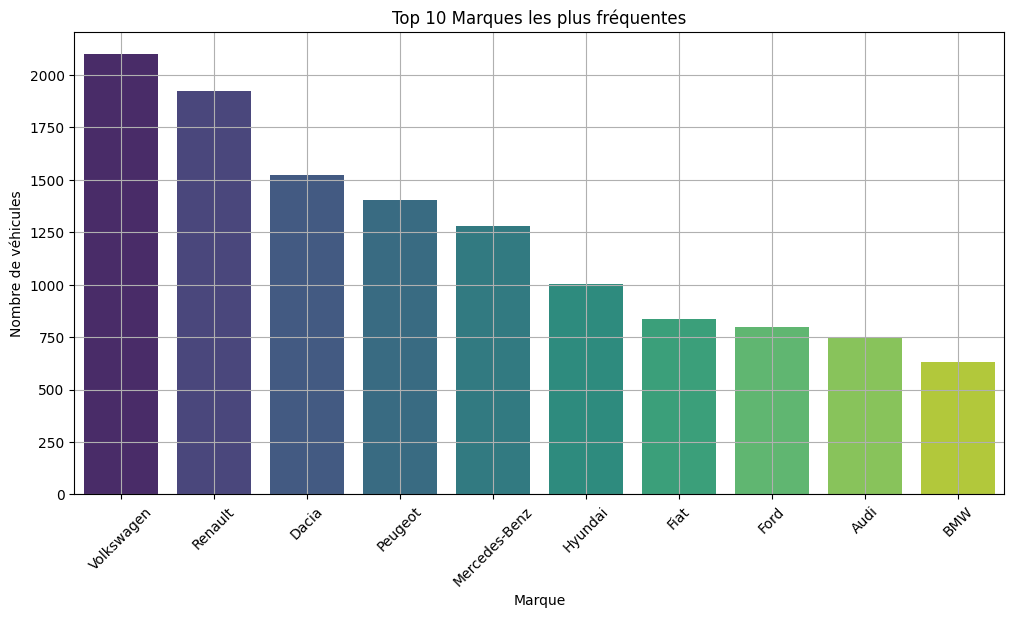

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Marques les plus fr√©quentes
top_marques = df_eda['Marque'].value_counts().head(10)

# Cr√©ation du graphique
plt.figure(figsize=(12,6))
sns.barplot(x=top_marques.index, y=top_marques.values, palette="viridis", hue=top_marques.index, legend=False)
plt.title("Top 10 Marques les plus fr√©quentes")
plt.xlabel("Marque")
plt.ylabel("Nombre de v√©hicules")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


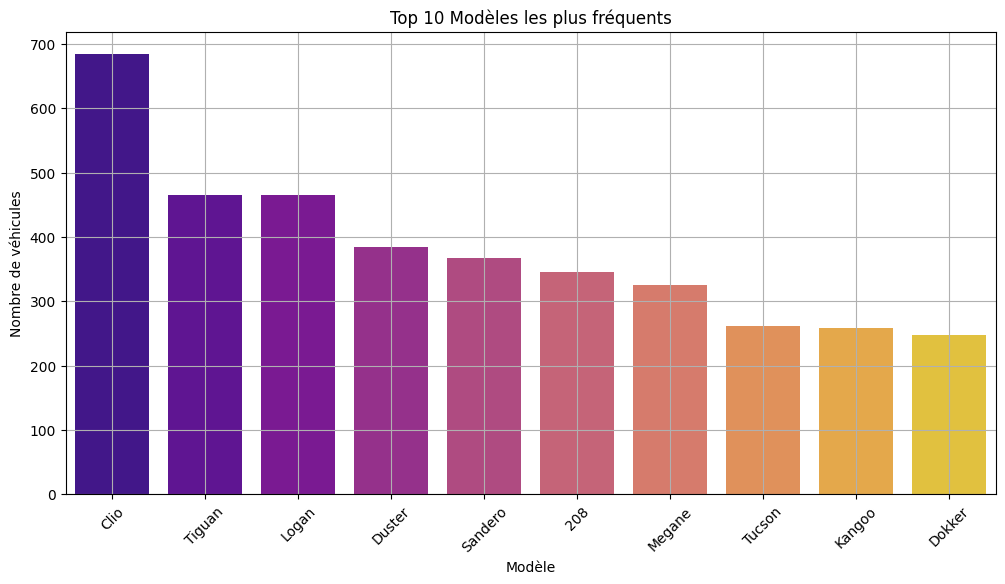

In [ ]:
# Top 10 Mod√®les les plus fr√©quents
top_modeles = df_eda['Mod√®le'].value_counts().head(10)

# Cr√©ation du graphique
plt.figure(figsize=(12,6))
sns.barplot(x=top_modeles.index, y=top_modeles.values, palette="plasma", hue=top_modeles.index, legend=False)
plt.title("Top 10 Mod√®les les plus fr√©quents")
plt.xlabel("Mod√®le")
plt.ylabel("Nombre de v√©hicules")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Plotting the correlation coefficient heatmap to visualize the relationship of each numericle variable

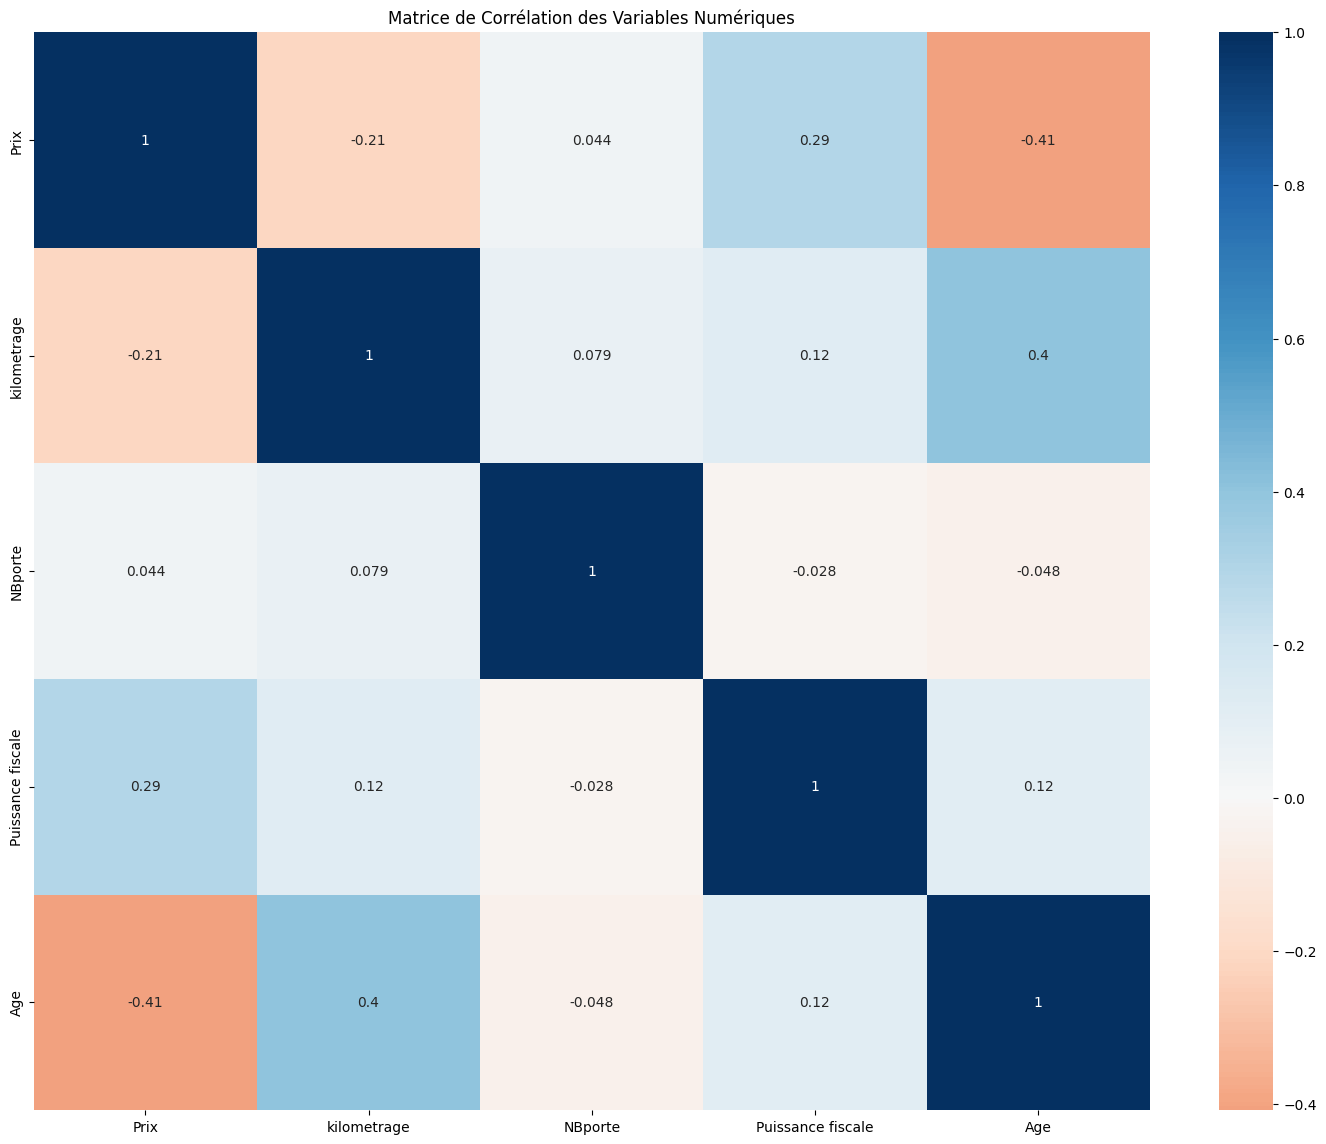

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garder uniquement les colonnes num√©riques
df_corr = df_eda.select_dtypes(include=['float64', 'int64'])

# Tracer la Heatmap de la matrice de corr√©lation
plt.figure(figsize=(18,14))
sns.heatmap(df_corr.corr(), annot=True, cmap="RdBu", center=0)
plt.title("Matrice de Corr√©lation des Variables Num√©riques")
plt.show()


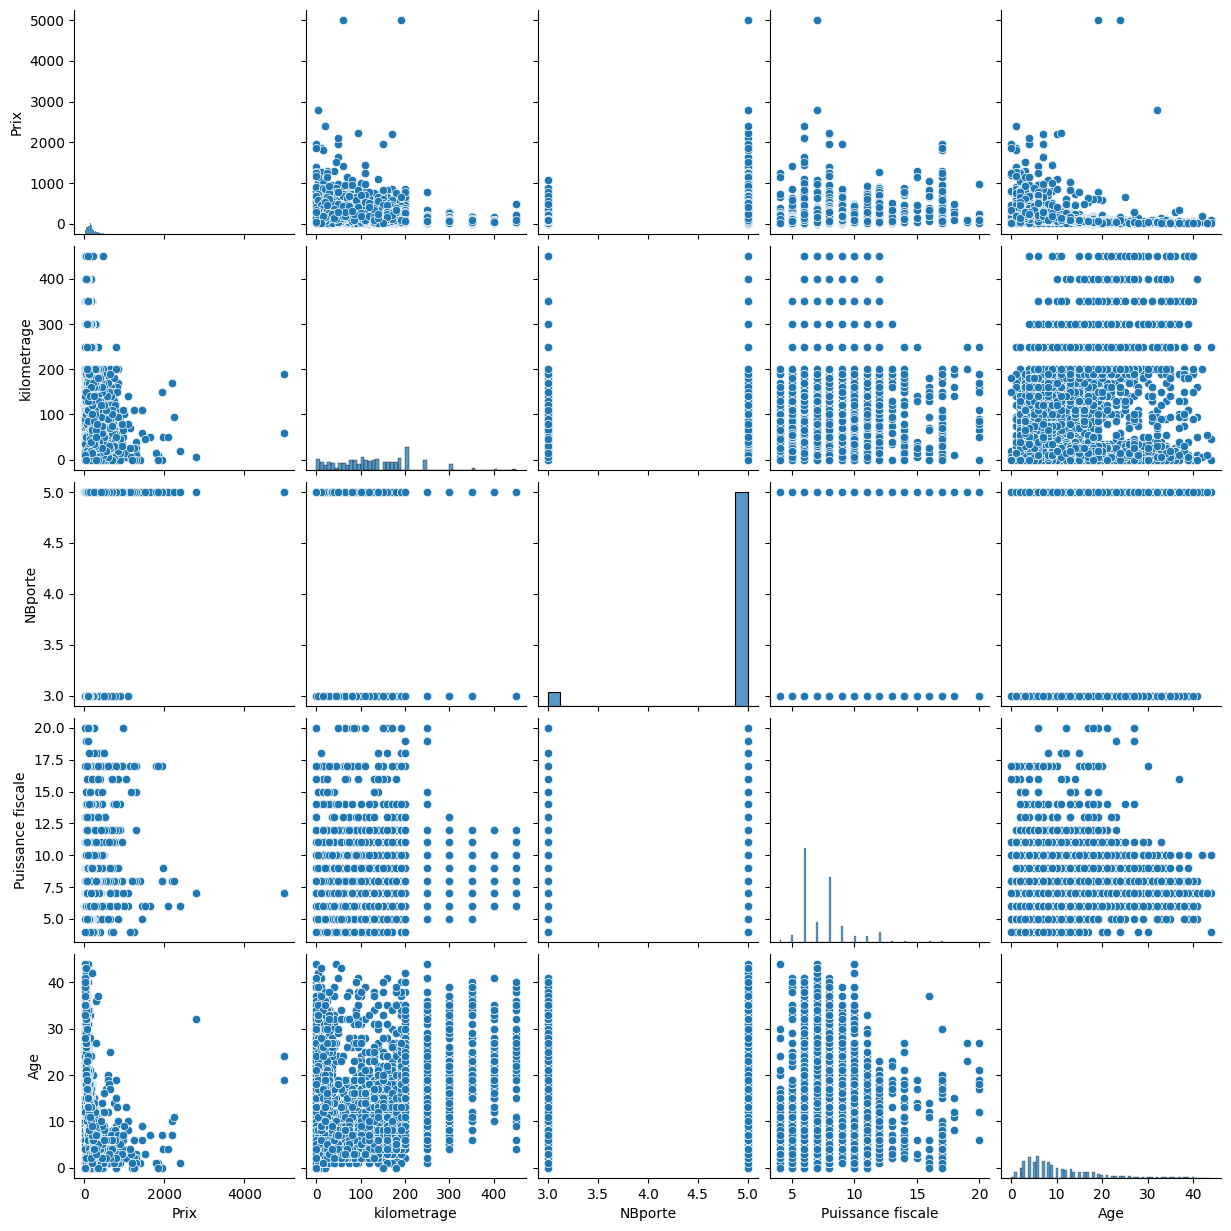

In [ ]:
sns.pairplot(df_eda)

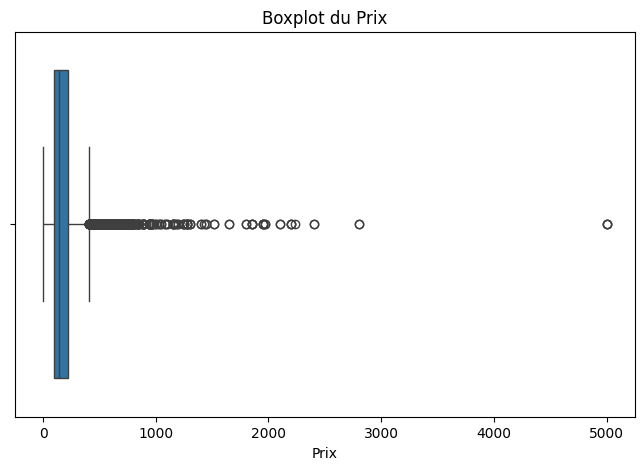

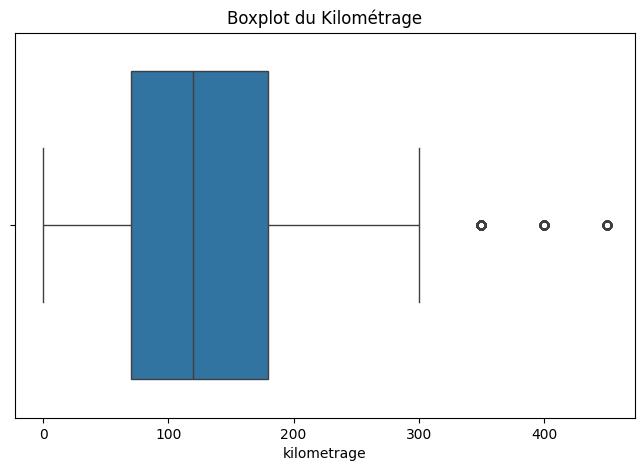

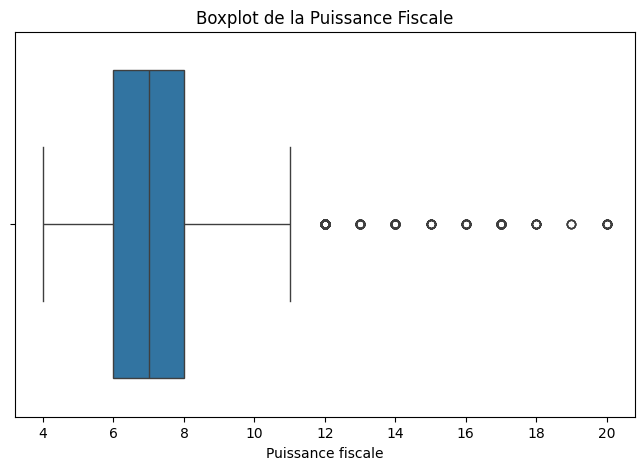

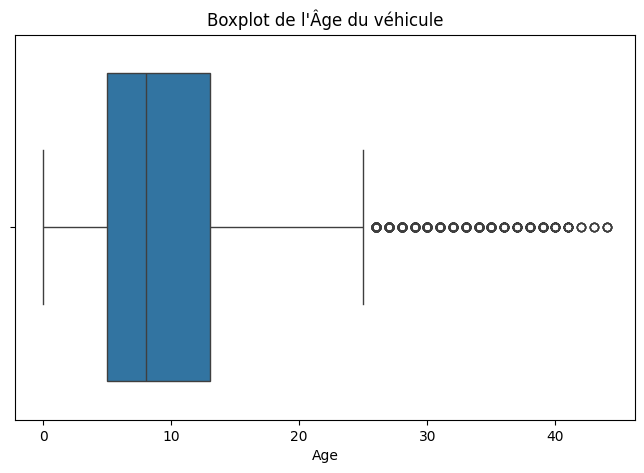

In [ ]:
# Prix
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['Prix'])
plt.title("Boxplot du Prix")
plt.show()

# Kilom√©trage
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['kilometrage'])
plt.title("Boxplot du Kilom√©trage")
plt.show()

# Puissance fiscale
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['Puissance fiscale'])
plt.title("Boxplot de la Puissance Fiscale")
plt.show()

# Age
plt.figure(figsize=(8,5))
sns.boxplot(x=df_eda['Age'])
plt.title("Boxplot de l'√Çge du v√©hicule")
plt.show()


In [ ]:
Q1 = df_eda['Prix'].quantile(0.25)
Q3 = df_eda['Prix'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['Prix'] < seuil_bas) | (df_eda['Prix'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")


Q1 = 95.0
Q3 = 220.0
IQR = 125.0
Seuil bas = -92.5
Seuil haut = 407.5
Nombre de valeurs aberrantes = 912


In [ ]:
Q1 = df_eda['Age'].quantile(0.25)
Q3 = df_eda['Age'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['Age'] < seuil_bas) | (df_eda['Age'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")

Q1 = 5.0
Q3 = 13.0
IQR = 8.0
Seuil bas = -7.0
Seuil haut = 25.0
Nombre de valeurs aberrantes = 791


In [ ]:
Q1 = df_eda['kilometrage'].quantile(0.25)
Q3 = df_eda['kilometrage'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['kilometrage'] < seuil_bas) | (df_eda['kilometrage'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")

Q1 = 70.0
Q3 = 180.0
IQR = 110.0
Seuil bas = -95.0
Seuil haut = 345.0
Nombre de valeurs aberrantes = 329


In [ ]:
Q1 = df_eda['Puissance fiscale'].quantile(0.25)
Q3 = df_eda['Puissance fiscale'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR
outliers = df_eda[(df_eda['Puissance fiscale'] < seuil_bas) | (df_eda['Puissance fiscale'] > seuil_haut)]

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Seuil bas = {seuil_bas}")
print(f"Seuil haut = {seuil_haut}")
print(f"Nombre de valeurs aberrantes = {outliers.shape[0]}")

Q1 = 6.0
Q3 = 8.0
IQR = 2.0
Seuil bas = 3.0
Seuil haut = 11.0
Nombre de valeurs aberrantes = 1023


In [ ]:
df_outliers = df_eda[df_eda['Prix'] > 400]  # Par exemple
df_outliers[['Prix', 'Marque', 'Mod√®le', 'Age', 'kilometrage', 'Puissance fiscale']]


Prix         Marque             Mod√®le   Age  kilometrage  \
33     475.0  Mercedes-Benz         Classe CLA   4.0        450.0   
55     420.0     Land Rover  Range Rover Sport   8.0        180.0   
59     490.0  Mercedes-Benz                220   6.0         80.0   
74     410.0            BMW            S√©rie 5   4.0        100.0   
78     479.0     Land Rover  Range Rover Velar   7.0         85.0   
...      ...            ...                ...   ...          ...   
17478  445.0     Volkswagen             Golf 8   4.0         60.0   
17520  445.0          Tesla            Model 3   5.0         75.0   
17535  530.0     Land Rover  Range Rover Vogue   6.0        110.0   
17553  500.0     Land Rover  Range Rover Sport   6.0        120.0   
17572  420.0        Porsche            Cayenne  10.0        120.0   

       Puissance fiscale  
33                   8.0  
55                  12.0  
59                   8.0  
74                   8.0  
78                   8.0  
...                  ...  
17478                8.0  
17520               12.0  
17535               12.0  
17553               12.0  
17572               12.0  

[914 rows x 6 columns]

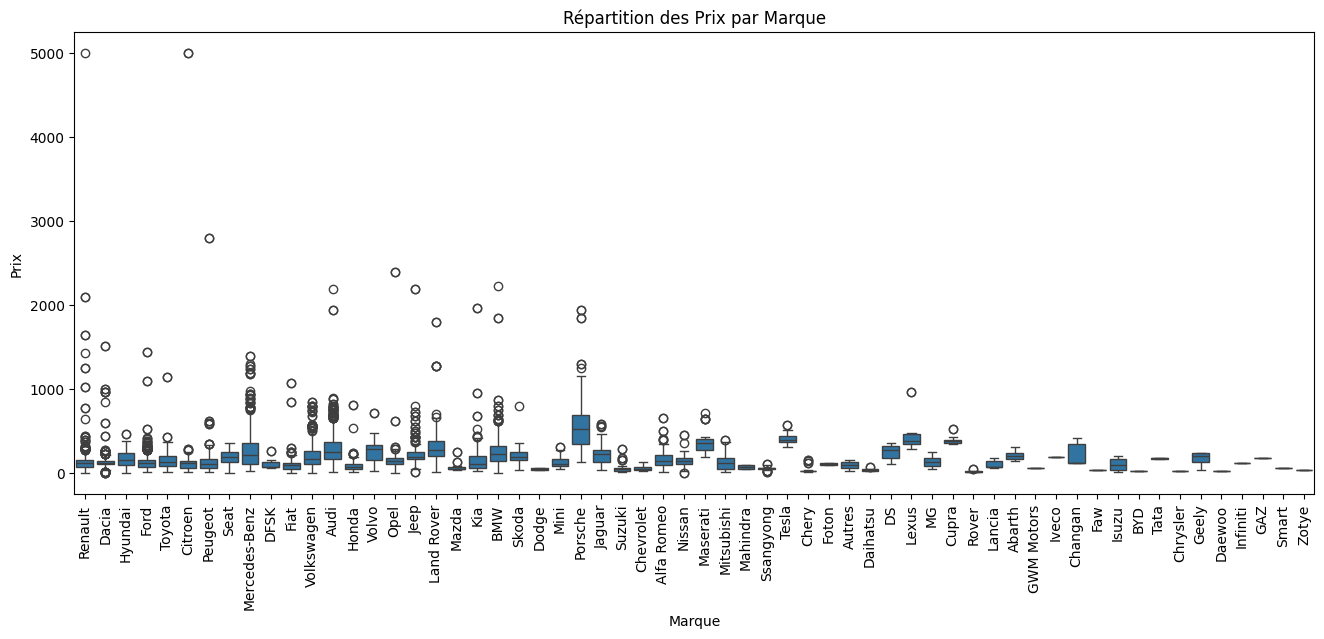

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Marque', y='Prix', data=df_eda)
plt.xticks(rotation=90)
plt.title("R√©partition des Prix par Marque")
plt.show()


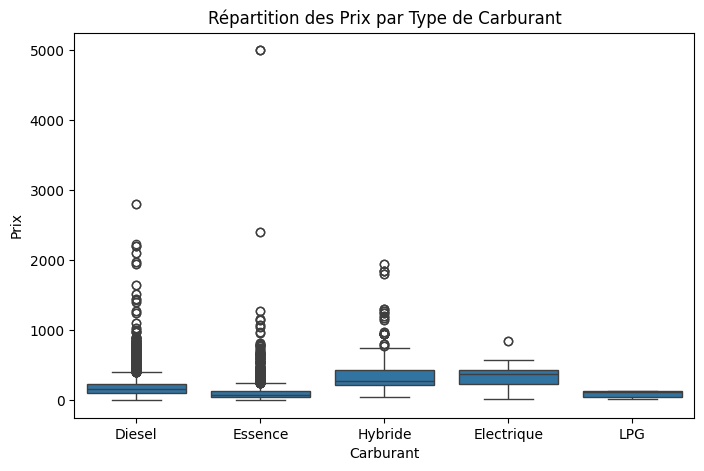

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Carburant', y='Prix', data=df_eda)
plt.title("R√©partition des Prix par Type de Carburant")
plt.show()


In [ ]:
import scipy.stats as stats

# Utiliser ton vrai DataFrame
anova_data = [group["Prix"].values for name, group in df_eda.groupby("Marque")]

anova_result = stats.f_oneway(*anova_data)

print("Statistique F =", anova_result.statistic)
print("P-value =", anova_result.pvalue)

# Interpr√©tation
if anova_result.pvalue < 0.05:
    print("Il y a une diff√©rence significative entre les marques en termes de prix.")
else:
    print("Pas de diff√©rence significative d√©tect√©e.")



Statistique F = 66.56245230103133
P-value = 0.0
Il y a une diff√©rence significative entre les marques en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Mod√®le'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Mod√®le")]
anova_result_model = stats.f_oneway(*anova_data_model)

# R√©sultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interpr√©tation
if anova_result_model.pvalue < 0.05:
    print("Il y a une diff√©rence significative entre les mod√®les en termes de prix.")
else:
    print("Aucune diff√©rence significative entre les mod√®les.")


Statistique F = 21.83145477094518
P-value = 0.0
Il y a une diff√©rence significative entre les mod√®les en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Mod√®le'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Etat")]
anova_result_model = stats.f_oneway(*anova_data_model)

# R√©sultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interpr√©tation
if anova_result_model.pvalue < 0.05:
    print("Il y a une diff√©rence significative entre les Etat en termes de prix.")
else:
    print("Aucune diff√©rence significative entre les Etat.")


Statistique F = 362.7061997094882
P-value = 1.4252770901150178e-228
Il y a une diff√©rence significative entre les Etat en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Mod√®le'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Origine")]
anova_result_model = stats.f_oneway(*anova_data_model)

# R√©sultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interpr√©tation
if anova_result_model.pvalue < 0.05:
    print("Il y a une diff√©rence significative entre les Origine en termes de prix.")
else:
    print("Aucune diff√©rence significative entre les Origine.")


Statistique F = 218.07342220511552
P-value = 6.630323243199666e-139
Il y a une diff√©rence significative entre les Origine en termes de prix.


In [ ]:
import scipy.stats as stats

# Test ANOVA pour la variable 'Mod√®le'
anova_data_model = [group["Prix"].values for name, group in df_eda.groupby("Premi√®re main")]
anova_result_model = stats.f_oneway(*anova_data_model)

# R√©sultats
print("Statistique F =", anova_result_model.statistic)
print("P-value =", anova_result_model.pvalue)

# Interpr√©tation
if anova_result_model.pvalue < 0.05:
    print("Il y a une diff√©rence significative entre les Premi√®re main en termes de prix.")
else:
    print("Aucune diff√©rence significative entre les Premi√®re main.")


Statistique F = 1109.3806223161591
P-value = 6.201692612897059e-236
Il y a une diff√©rence significative entre les Premi√®re main en termes de prix.


In [ ]:
import scipy.stats as stats

# Utiliser ton vrai DataFrame
anova_data = [group["Prix"].values for name, group in df_eda.groupby("Carburant")]

anova_result = stats.f_oneway(*anova_data)

print("Statistique F =", anova_result.statistic)
print("P-value =", anova_result.pvalue)

# Interpr√©tation
if anova_result.pvalue < 0.05:
    print("Il y a une diff√©rence significative entre les types de Carburant en termes de prix.")
else:
    print("Pas de diff√©rence significative d√©tect√©e.")


Statistique F = 295.19678978039815
P-value = 3.87395888396889e-246
Il y a une diff√©rence significative entre les types de Carburant en termes de prix.


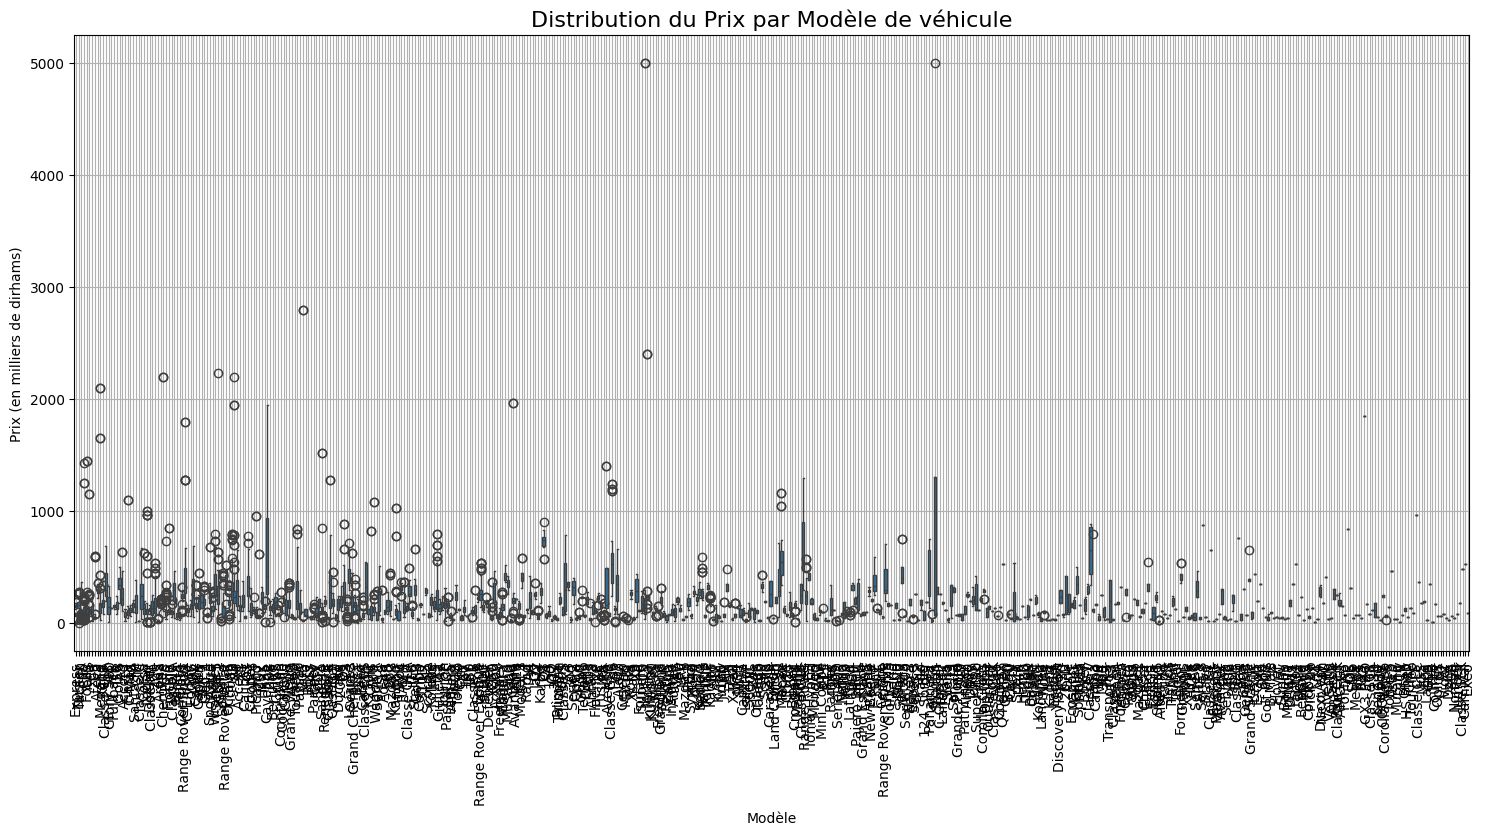

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.boxplot(data=df_eda, x="Mod√®le", y="Prix")
plt.title("Distribution du Prix par Mod√®le de v√©hicule", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel("Mod√®le")
plt.ylabel("Prix (en milliers de dirhams)")
plt.grid(True)
plt.show()


In [ ]:
df_transformed = pd.read_csv("avito_pfm_transformed.csv")

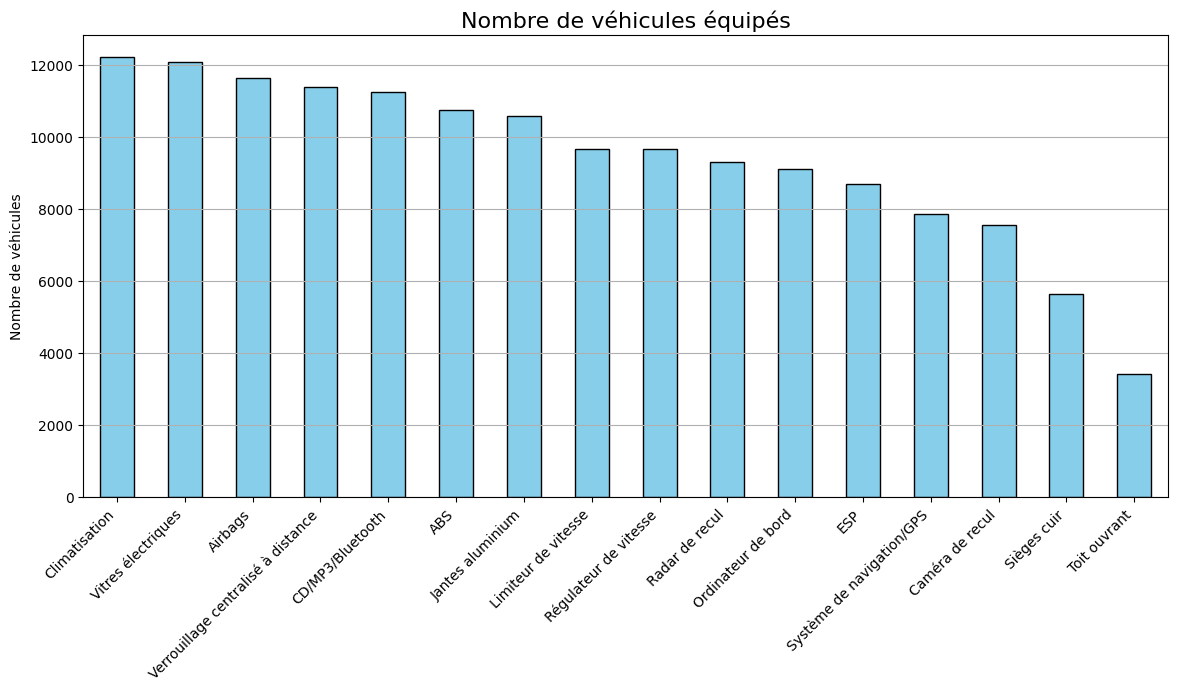

In [ ]:
import matplotlib.pyplot as plt

# Liste des colonnes √©quipements
equipements_cols = ['Limiteur de vitesse', 'Jantes aluminium', 'CD/MP3/Bluetooth', 
                    'Climatisation', 'Vitres √©lectriques', 'Verrouillage centralis√© √† distance',
                    'Airbags', 'Cam√©ra de recul', 'Syst√®me de navigation/GPS', 'Radar de recul',
                    'ESP', 'ABS', 'Ordinateur de bord', 'R√©gulateur de vitesse', 'Si√®ges cuir', 'Toit ouvrant']

# Compter les √©quipements sur df_transformed (pas df_eda)
equipement_counts = df_transformed[equipements_cols].sum().sort_values(ascending=False)

# Afficher le barplot
plt.figure(figsize=(14, 6))
equipement_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Nombre de v√©hicules √©quip√©s", fontsize=16)
plt.ylabel("Nombre de v√©hicules")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Climatisation"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Climatisation"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans climatisation.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 11.311, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans climatisation.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Limiteur de vitesse"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Limiteur de vitesse"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Limiteur de vitesse.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 27.181, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Limiteur de vitesse.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Jantes aluminium"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Jantes aluminium"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Jantes aluminium.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 21.032, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Jantes aluminium.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["CD/MP3/Bluetooth"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["CD/MP3/Bluetooth"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans CD/MP3/Bluetooth.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 9.475, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans CD/MP3/Bluetooth.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Vitres √©lectriques"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Vitres √©lectriques"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Vitres √©lectriques.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 8.477, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Vitres √©lectriques.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Verrouillage centralis√© √† distance"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Verrouillage centralis√© √† distance"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Verrouillage centralis√© √† distance.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 10.370, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Verrouillage centralis√© √† distance.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Airbags"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Airbags"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Airbags.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 13.678, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Airbags.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Cam√©ra de recul"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Cam√©ra de recul"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Cam√©ra de recul.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 33.628, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Cam√©ra de recul.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Syst√®me de navigation/GPS"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Syst√®me de navigation/GPS"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Cam√©ra de recul.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 32.642, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Cam√©ra de recul.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Radar de recul"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Radar de recul"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Radar de recul.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 28.923, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Radar de recul.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["ESP"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["ESP"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans ESP.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 25.221, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans ESP.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["ABS"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["ABS"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans ABS.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 16.997, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans ABS.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Ordinateur de bord"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Ordinateur de bord"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Ordinateur de bord.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 27.894, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Ordinateur de bord.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["R√©gulateur de vitesse"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["R√©gulateur de vitesse"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans R√©gulateur de vitesse.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 28.637, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans R√©gulateur de vitesse.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Si√®ges cuir"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Si√®ges cuir"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Si√®ges cuir.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 33.643, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Si√®ges cuir.


In [ ]:
from scipy.stats import ttest_ind

# S√©parer les groupes
prix_avec = df_transformed[df_transformed["Toit ouvrant"] == 1]["Prix"]
prix_sans = df_transformed[df_transformed["Toit ouvrant"] == 0]["Prix"]

# Test T
stat, p_value = ttest_ind(prix_avec, prix_sans)
print(f"Statistique T : {stat:.3f}, P-value : {p_value:.5f}")

# Conclusion
if p_value < 0.05:
    print("Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Toit ouvrant.")
else:
    print("Pas de diff√©rence significative.")


Statistique T : 39.979, P-value : 0.00000
Il y a une diff√©rence significative du prix entre v√©hicules avec et sans Toit ouvrant.


√âtude des Tendances du March√©

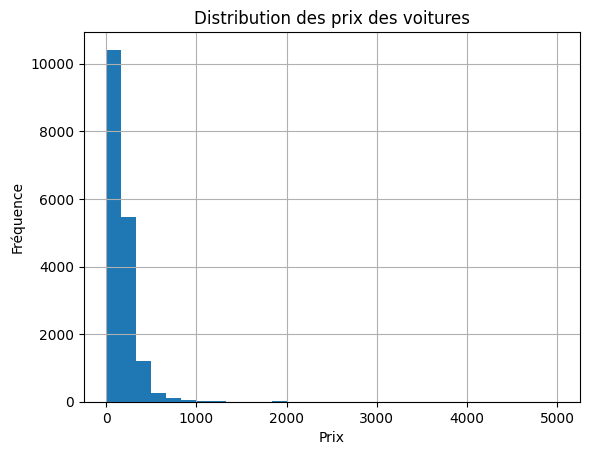

In [ ]:
# Analyser la distribution des prix
import matplotlib.pyplot as plt
df_eda['Prix'].hist(bins=30)
plt.title('Distribution des prix des voitures')
plt.xlabel('Prix')
plt.ylabel('Fr√©quence')
plt.show()


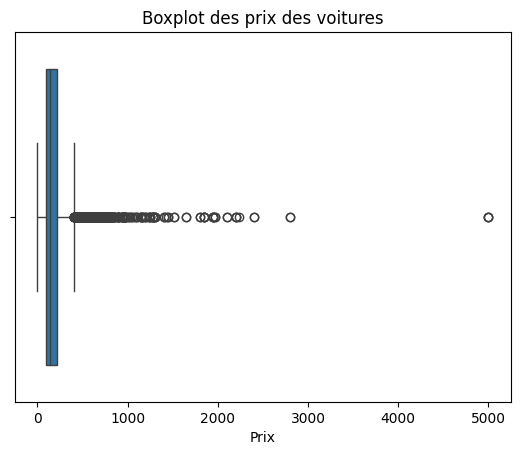

In [ ]:
#  boxplot te permettra d‚Äôobserver les valeurs extr√™mes et la dispersion des prix.
import seaborn as sns
sns.boxplot(x=df_eda['Prix'])
plt.title('Boxplot des prix des voitures')
plt.show()


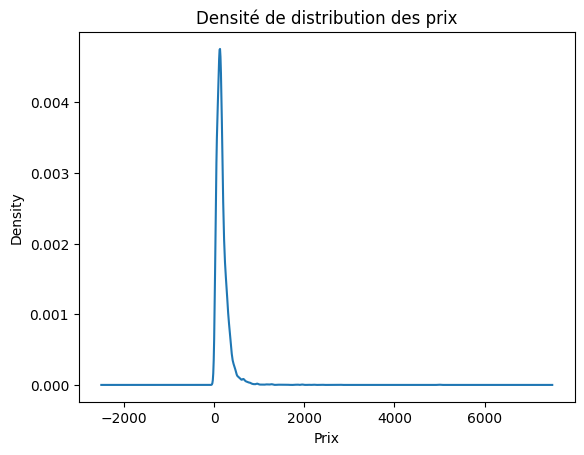

In [ ]:
# Utiliser un plot de densit√© pour observer o√π la plupart des prix sont concentr√©s.
df_eda['Prix'].plot(kind='kde')
plt.title('Densit√© de distribution des prix')
plt.xlabel('Prix')
plt.show()


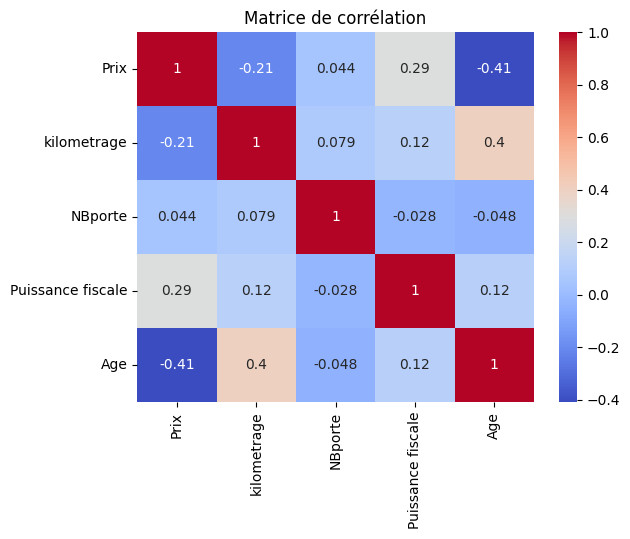

In [ ]:
# Utilise une matrice de corr√©lation pour analyser la relation entre les diff√©rentes variables (√¢ge, marque, kilom√©trage, etc.) et le prix.
# S√©lectionner uniquement les colonnes num√©riques
df_numeric = df_eda.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corr√©lation
corr_matrix = df_numeric.corr()

# Afficher la matrice de corr√©lation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corr√©lation')
plt.show()



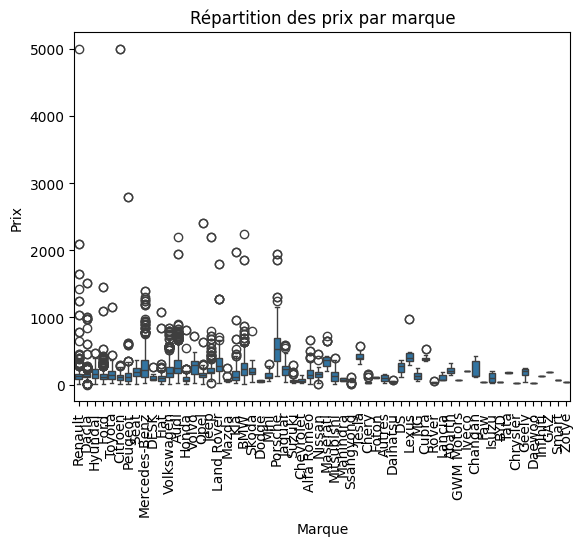

In [ ]:
# Cr√©e un boxplot ou bar plot pour visualiser la r√©partition des prix en fonction de la marque ou du type de carburant.
sns.boxplot(x='Marque', y='Prix', data=df_eda)
plt.title('R√©partition des prix par marque')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Utilise la r√©gression lin√©aire pour analyser l'impact des variables num√©riques sur le prix.
from sklearn.linear_model import LinearRegression
X = df_eda[['kilometrage', 'Age', 'Puissance fiscale']]  # Exemple de variables
y = df_eda['Prix']
model = LinearRegression()
model.fit(X, y)
print('Coefficients :', model.coef_)


Coefficients : [-0.17887506 -9.23552472 29.14787159]


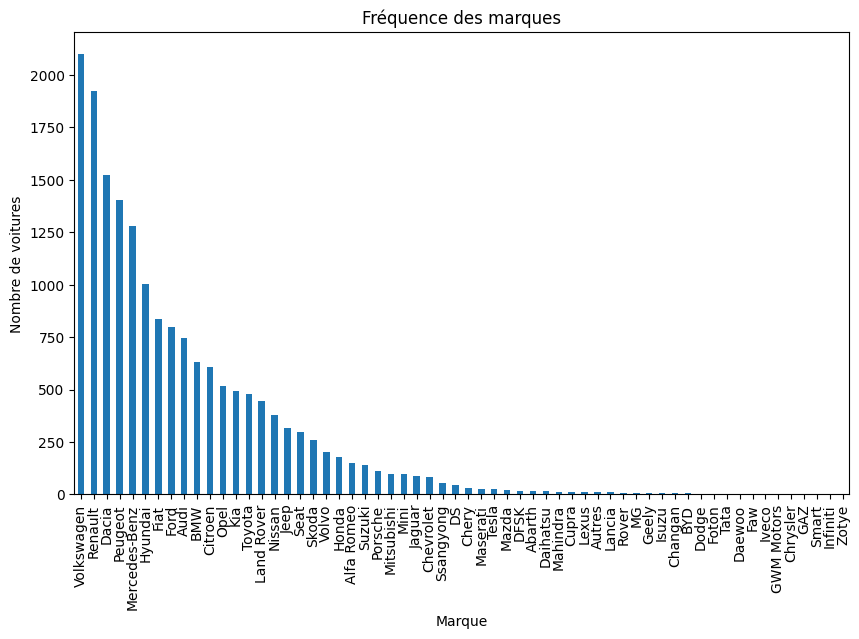

In [ ]:
# Utilise un bar plot pour visualiser la fr√©quence des marques et mod√®les.
marque_counts = df_eda['Marque'].value_counts()
marque_counts.plot(kind='bar', figsize=(10,6))
plt.title('Fr√©quence des marques')
plt.ylabel('Nombre de voitures')
plt.show()


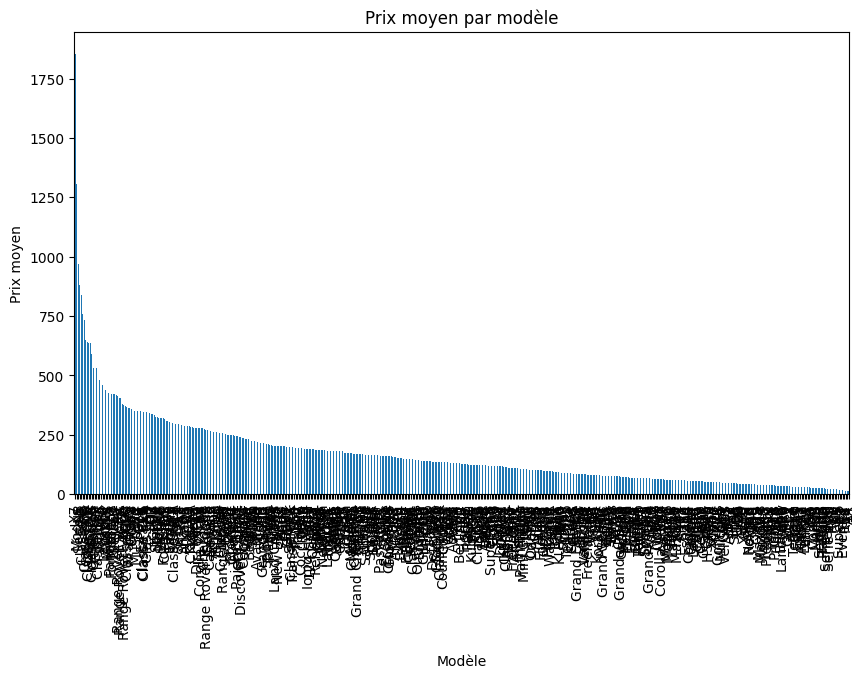

In [ ]:
# Cr√©e un bar plot ou boxplot pour comparer les prix moyens des mod√®les populaires.
modele_prices = df_eda.groupby('Mod√®le')['Prix'].mean().sort_values(ascending=False)
modele_prices.plot(kind='bar', figsize=(10,6))
plt.title('Prix moyen par mod√®le')
plt.ylabel('Prix moyen')
plt.show()


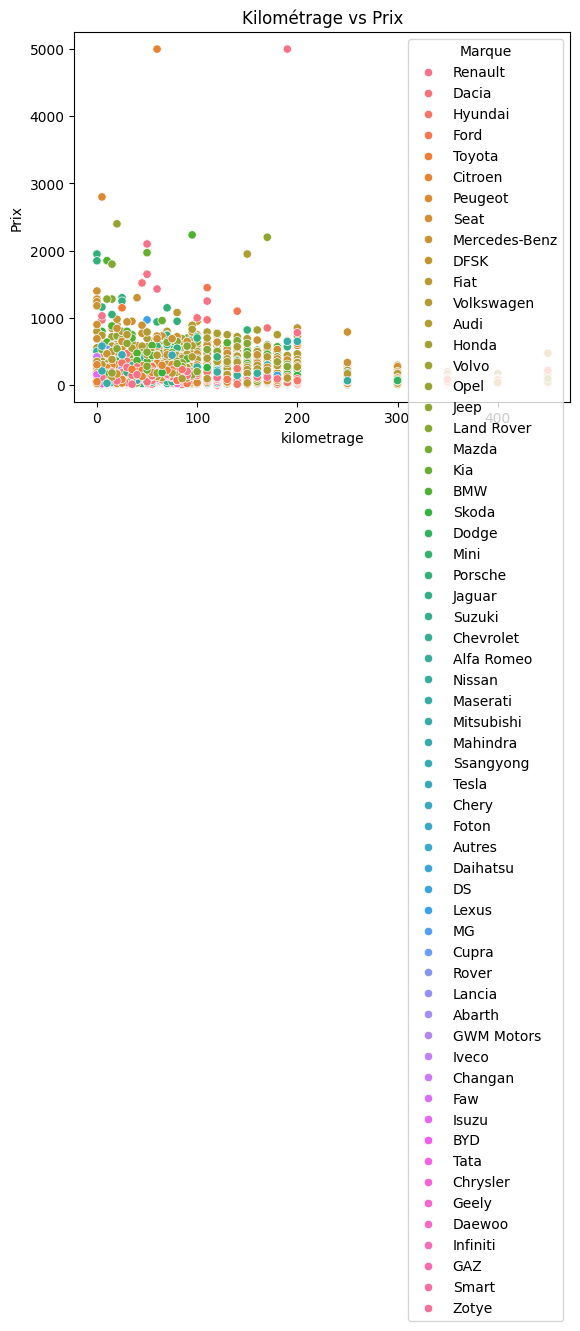

In [ ]:
# Si un mod√®le a un √©cart de prix √©lev√©, cela peut indiquer qu'il est sur√©valu√© ou sous-√©valu√©. Utilise un scatter plot pour analyser les prix en fonction des caract√©ristiques (ex : kilom√©trage vs prix).
sns.scatterplot(x='kilometrage', y='Prix', hue='Marque', data=df_eda)
plt.title('Kilom√©trage vs Prix')
plt.show()


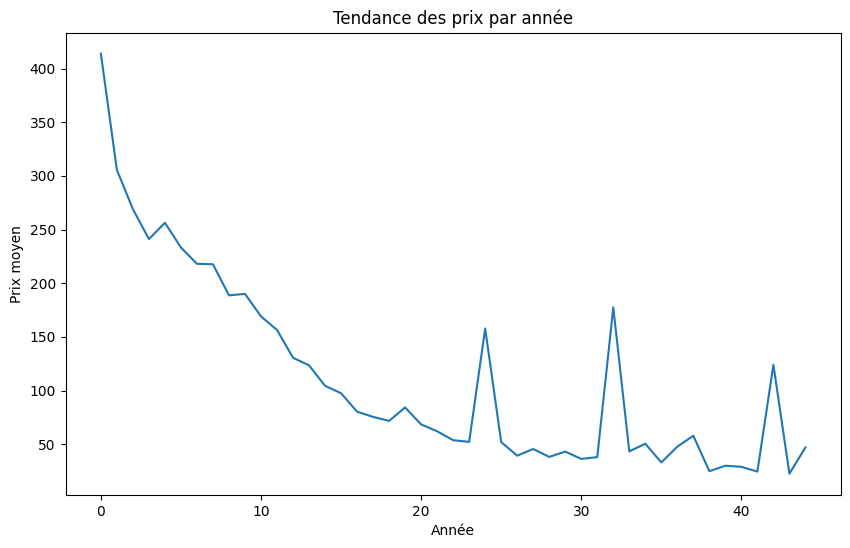

In [ ]:
# Si tu as une colonne repr√©sentant l‚Äôann√©e ou le mois, tu peux cr√©er un plot temporel pour visualiser les tendances des prix au fil du temps.
df_eda.groupby('Age')['Prix'].mean().plot(kind='line', figsize=(10,6))
plt.title('Tendance des prix par ann√©e')
plt.xlabel('Ann√©e')
plt.ylabel('Prix moyen')
plt.show()
